<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Combined_Plots_SPI%26SPEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter, YearLocator

In [17]:
from google.colab import files
uploaded = files.upload()

Saving MonthlyDataLCUVS2.csv to MonthlyDataLCUVS2 (1).csv


In [20]:
# Replace 'your_file.csv' with the actual name of your file
df = pd.read_csv('MonthlyDataLCUVS2.csv', delimiter= ';', skipinitialspace=True)

# Display the first few rows to understand the structure
print(df.head(2))

         date  SAVI_UVS  MSAVI_UVS  NDVI_UVS   EVI_UVS    RF_UVS    ET_UVS  \
0  2019/03/31  0.423300   0.415157  0.614560  0.456100  3.494194  3.793974   
1  2019/04/30  0.423543   0.413157  0.580767  0.475743  2.294667  2.762200   

   SPEI3_UVS  SPI3_UVS   VCI_UVS  ...  MSAVI_LC   NDVI_LC   EVI_LC     RF_LC  \
0   1.101960  0.300789  0.371444  ...  0.379540  0.614560  0.59602  5.594616   
1   0.097428  0.301395  0.468333  ...  0.327233  0.580767  0.53305  2.531303   

      ET_LC  SPEI3_LC   SPI3_LC  VCI_LC  Nino3.4_LC    DMI_LC  
0  4.062029  1.101960  0.762170   0.551    0.867725  0.377138  
1  2.988177  0.097428  0.066812   0.592    0.740107  0.442555  

[2 rows x 23 columns]


In [23]:
# Load your dataset, handling potential issues with the 'date' column
# The delimiter and skipinitialspace arguments are preserved from the original code.
df = pd.read_csv('MonthlyDataLCUVS2.csv', delimiter=';', skipinitialspace=True)

# Inspect the column names to identify the actual date column
print(df.columns)

# Assuming the actual date column is named 'date', for example
# Replace 'date' with the actual name if different
date_column_name = 'date'
# If the date column has a different format, adjust the format string accordingly
df['date'] = pd.to_datetime(df[date_column_name], format='%Y-%m-%d')
# Remove the original date column (optional)
# df = df.drop(columns=[date_column_name])

# Sort by date to avoid any disorder
df = df.sort_values('date')

Index(['date', 'SAVI_UVS', 'MSAVI_UVS', 'NDVI_UVS', 'EVI_UVS', 'RF_UVS',
       'ET_UVS', 'SPEI3_UVS', 'SPI3_UVS', 'VCI_UVS', 'Nino3.4_UVS', 'DMI_UVS',
       'SAVI_LC', 'MSAVI_LC', 'NDVI_LC', 'EVI_LC', 'RF_LC', 'ET_LC',
       'SPEI3_LC', 'SPI3_LC', 'VCI_LC', 'Nino3.4_LC', 'DMI_LC'],
      dtype='object')


ValueError: time data "2019/03/31" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [24]:
# Step 1: Install required packages (skip if already installed)
!pip install pandas matplotlib
!pip install folium
!pip install rasterio

AttributeError: 'str' object has no attribute 'strftime'

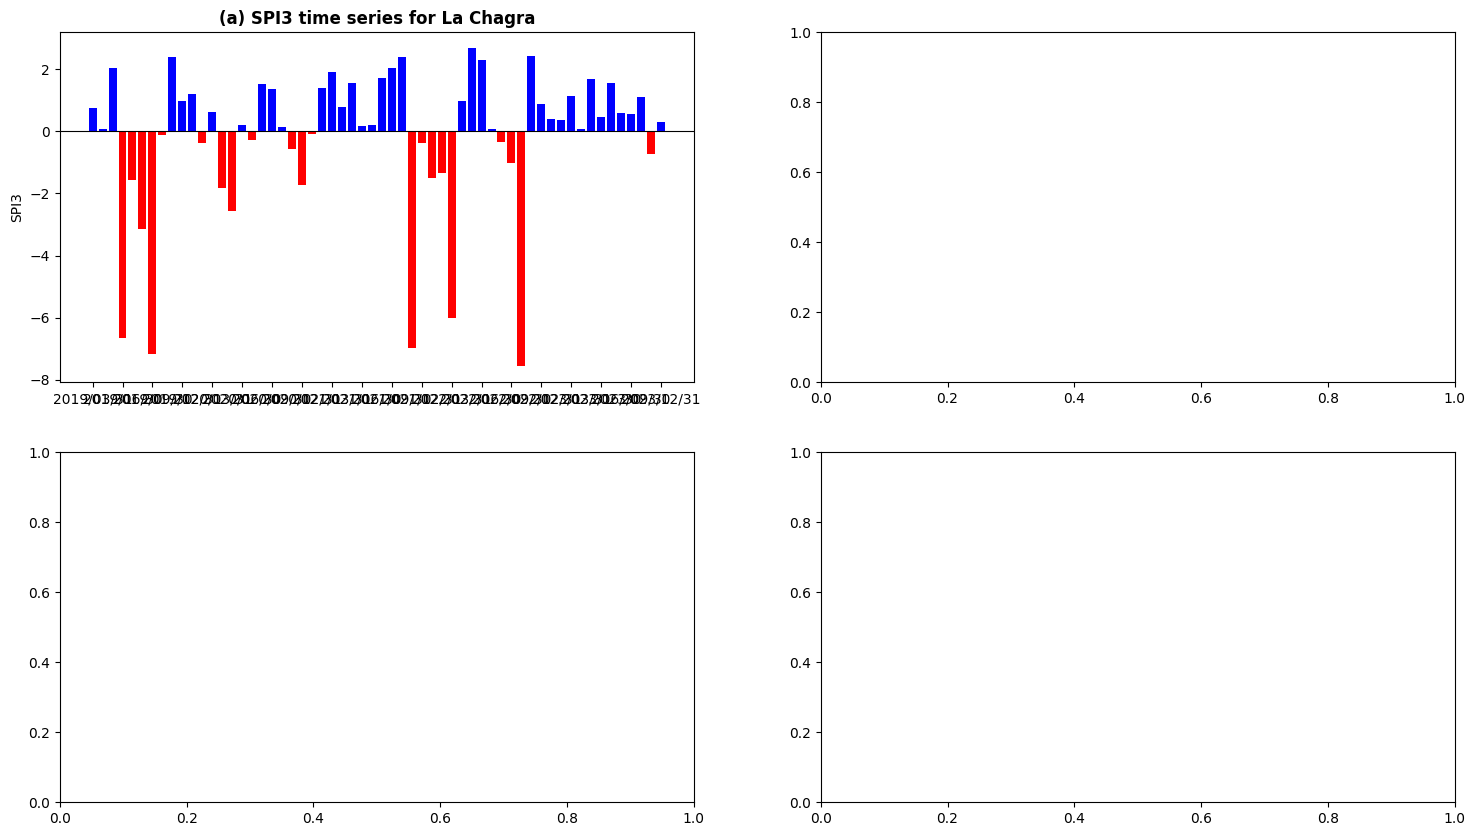

In [25]:
# Define plot function
def plot_spi_spei_bars(ax, dates, values, title, ylabel):
    colors = ['blue' if v >= 0 else 'red' for v in values]
    ax.bar(dates, values, color=colors)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.set_xticks(dates[::3])
    ax.set_xticklabels([d.strftime('%Y-%m') for d in dates[::3]], rotation=45)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Plot SPI and SPEI for both locations
# Replace with the correct column names for SPI3_LC, SPI3_UVS, SPEI3_LC, SPEI3_UVS if different
plot_spi_spei_bars(axs[0], df['date'], df['SPI3_LC'], '(a) SPI3 time series for La Chagra', 'SPI3')
plot_spi_spei_bars(axs[1], df['date'], df['SPI3_UVS'], '(c) SPI3 time series for UVS', 'SPI3')
plot_spi_spei_bars(axs[2], df['date'], df['SPEI3_LC'], '(b) SPEI3 time series for La Chagra', 'SPEI3')
plot_spi_spei_bars(axs[3], df['date'], df['SPEI3_UVS'], '(d) SPEI3 time series for UVS', 'SPEI3')

# Adjust layout and display
plt.tight_layout()
plt.show()